# **1. Perkenalan Dataset**


Dataset ini berisi data penumpang kapal Titanic, yang digunakan untuk menganalisis faktor-faktor yang memengaruhi keselamatan penumpang pada tragedi tenggelamnya Titanic tahun 1912.

Tujuan utama dari dataset ini adalah untuk memprediksi apakah seorang penumpang selamat atau tidak (Survived), berdasarkan karakteristik pribadi dan sosial-ekonomi penumpang.

1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/cities/titanic123?resource=download


# **2. Import Library**

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [69]:
df = pd.read_csv('dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [70]:
# Melihat dimensi dataset
print(f"Dimensi dataset : {df.shape}")

Dimensi dataset : (891, 12)


In [71]:
# Memeriksa nilai NaN
print(f"Jumlah nilai NaN : {df.isnull().sum()}")

Jumlah nilai NaN : PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [72]:
# Memeriksa nilai duplikasi
print(f"Jumlah nilai duplikasi : {df.duplicated().sum()}")

Jumlah nilai duplikasi : 0


In [73]:
# Melihat statistik deskriptif dataset
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


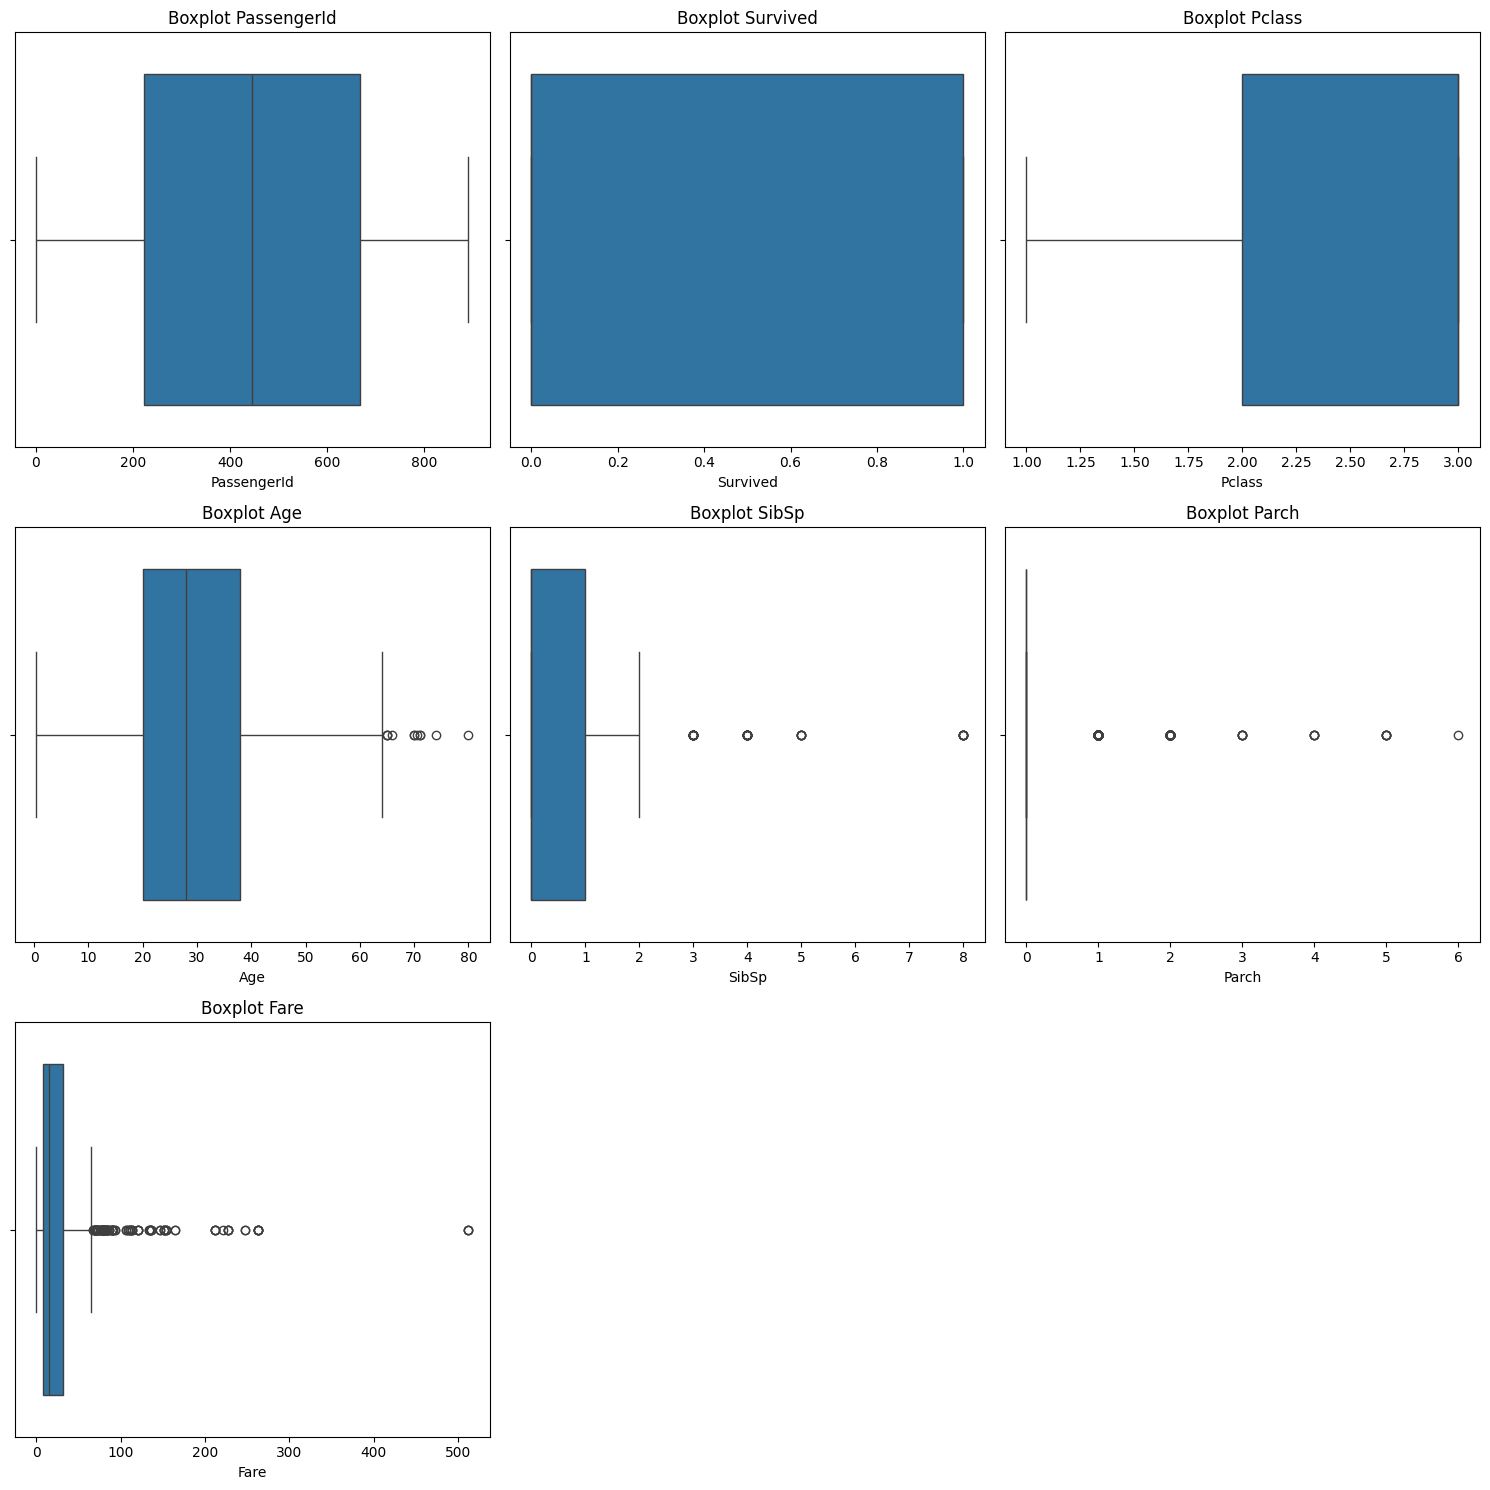

In [74]:
# Memeriksa outlier dengan boxplot
num_cols = df.select_dtypes(include=np.number).columns

# hitung jumlah baris (3 plot per baris)
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')

# hapus subplot kosong (kalau ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

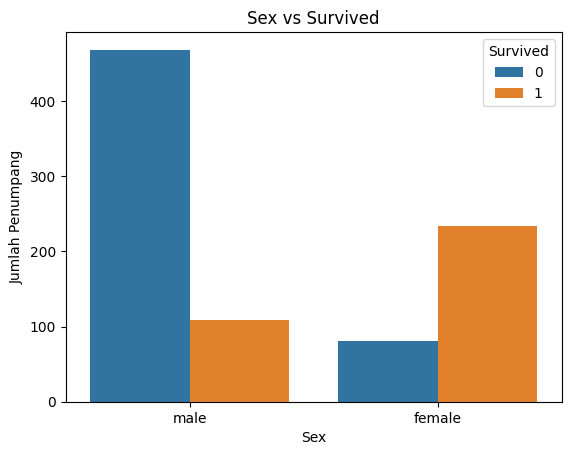

In [75]:
# Hubungan antar fitur Sex vs Survived
plt.figure()
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Sex vs Survived')
plt.xlabel('Sex')
plt.ylabel('Jumlah Penumpang')
plt.show()

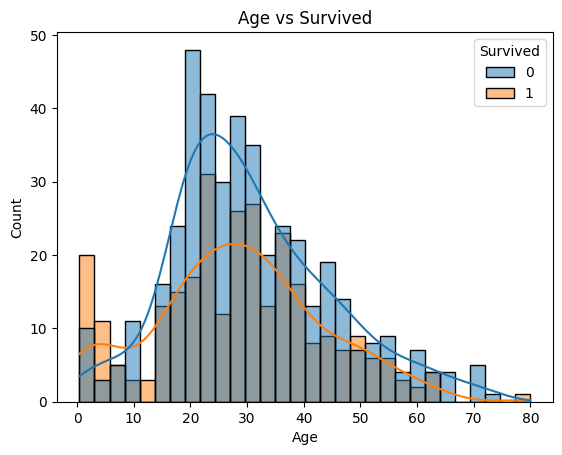

In [76]:
# Hubungan antar fitur Age vs Survived
plt.figure()
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age vs Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

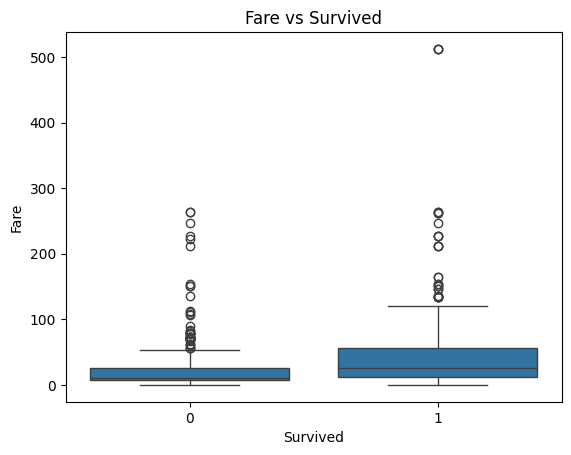

In [77]:
# Hubungan antar fitur Fare vs Survived
plt.figure()
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare vs Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

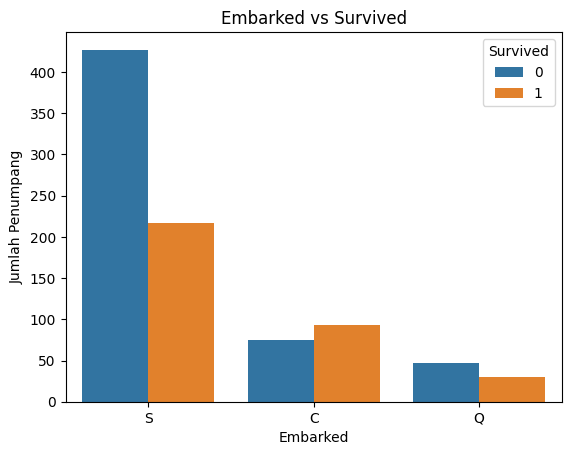

In [78]:
# Hubungan antar fitur Embarked vs Survived
plt.figure()
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Embarked vs Survived')
plt.xlabel('Embarked')
plt.ylabel('Jumlah Penumpang')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [79]:
# Menghapus fitur fitur yang tidak relevan
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [80]:
# Mengatasi nilai NaN dengan mean
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()).round().astype(int))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [81]:
# Mengecek jumlah nilai NaN kembali
print(f"Jumlah nilai NaN : {df.isnull().sum()}")

Jumlah nilai NaN : Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [82]:
# Menghapus data duplikasi
df = df.drop_duplicates()

# Melihat jumlah nilai duplikasi kembali
print(f"Jumlah nilai duplikasi : {df.duplicated().sum()}")

Jumlah nilai duplikasi : 0


In [83]:
# Menghapus outlier
num_cols = df.select_dtypes(include=np.number).columns
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [87]:
# List kolom kategorikal yang ingin di-encode
cat_cols = ['Sex', 'Embarked']

# Buat dictionary untuk menyimpan encoder tiap kolom
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2
